In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import warnings

In [2]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"baongocdinh","key":"1d82e639ddd6f73230ceda0ad5fa7201"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

 74% 49.0M/66.0M [00:02<00:01, 10.5MB/s]
100% 66.0M/66.0M [00:03<00:00, 22.5MB/s]


In [9]:
! mkdir train

In [10]:
! unzip creditcardfraud.zip -d train

Archive:  creditcardfraud.zip
  inflating: train/creditcard.csv    


In [69]:
df=pd.read_csv('/content/train/creditcard.csv')

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [66]:
#!pip install dataprep


     |████████████████████████████████| 194kB 5.5MB/s 
     |████████████████████████████████| 849kB 13.6MB/s 
     |████████████████████████████████| 727kB 18.9MB/s 
     |████████████████████████████████| 1.3MB 22.6MB/s 
     |████████████████████████████████| 1.4MB 39.7MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 368kB 38.9MB/s 
     |████████████████████████████████| 9.2MB 34.3MB/s 
     |████████████████████████████████| 102kB 11.2MB/s 
     |████████████████████████████████| 296kB 53.0MB/s 
     |████████████████████████████████| 143kB 56.3MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434678 sha256=7a475c028fec709b95e77e909eeea2b1f0a8b19a176175be0f399c8941085908
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=31

In [67]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing

# EDA

Using automated EDA packages will allow for a fast exploration of the dataset.
<p> The dataset is anonymized so the data labels give us no clue about the dataset. 
<p> Most of the columns seem to follow a normal distribution with the exception of 'Amount' and 'Time' column


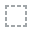
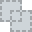
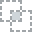
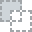
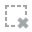
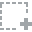
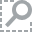
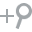
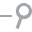
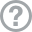
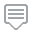
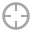
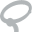
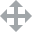
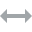
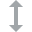
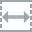
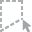
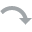
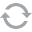
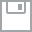
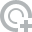
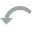
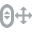
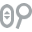
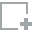
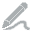
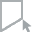
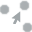
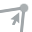
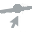

In [70]:
plot(df)

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [14]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

As we can see, there's very little 'fraud' here. This might pose a problem for our model later. This is called class imbalance where the categories we are trying to predict are greatly imbalanced (one is in majority, the other is the minority).

In [16]:
print("The skewness of the Amount feature is: ", df['Amount'].skew())
print("The skewness of the Time feature is: ", df['Time'].skew())

The skewness of the Amount feature is:  16.977724453761024
The skewness of the Time feature is:  -0.0355676180063216


Robust Scaler is used to normalize Amount and Time. 
<p>Scale features using statistics that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). 

In [14]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Amount', 'Time'], axis = 1, inplace = True)

In [15]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [16]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'scaled_time'],
      dtype='object')

In [17]:
df=df[['scaled_amount', 'scaled_time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'
       ]]

In [18]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Logistic regression with original data

Let's run a basic logistic regression first and see what happens

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(['Class'], axis = 1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, 
                                                    stratify = y)

In [73]:
lr = LogisticRegression(max_iter = 1000)

lr.fit(X_train, y_train)
prediction_lr = lr.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, precision_recall_curve, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt 

In [79]:
def evaluation(y_actual, predicted):
    labels = ['Non-Fraud', 'Fraud']
    np.set_printoptions(precision=2)
    plot_confusion_matrix(lr, X_test, y_test,normalize='true',cmap=plt.cm.Blues,display_labels=labels)  
    #cnf_matrix = confusion_matrix(y_actual, predicted)

    #sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
    #plt.ylabel('Actual Label')
    #plt.xlabel('Predicted Label')
    
    
    print(classification_report(y_actual, predicted, target_names = labels))
    

The model did well with the non-fraud class. However, the model is rather mediocre on the fraud class.
<p> Think of it from the point of the goal the bank is trying to achieve with this model.The cost of not catching the fraud can be very high. Therefore, using the 'accuracy' measure is not enough. 


              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85295
       Fraud       0.86      0.60      0.71       148

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



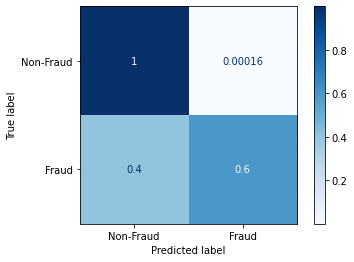

In [80]:
evaluation(y_test, prediction_lr)

Text(0.5, 1.0, 'Precision Recall Curve')

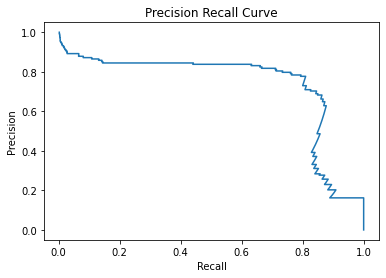

In [27]:
y_pred_prob = lr.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [28]:
print("AUC score is: ", roc_auc_score(y_test, prediction_lr))

AUC score is:  0.8141129830809766


AUC score of 0.81 is not really the worst, but let's see what we can do to improve it.

# Weighting the classes
Let’s try weighting the classes when we set up the classifier, and inspecting how the confusion matrix changes:
<p> In this case we are weighting the non-fraud class as 1 and the fraud class as 5.

In [37]:
lr = LogisticRegression(class_weight={0:1,1:5},max_iter=1000)

lr.fit(X_train, y_train)
prediction_lr = lr.predict(X_test)

Result: slightly better performance in identifying fraud

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85295
       Fraud       0.80      0.78      0.79       148

    accuracy                           1.00     85443
   macro avg       0.90      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443



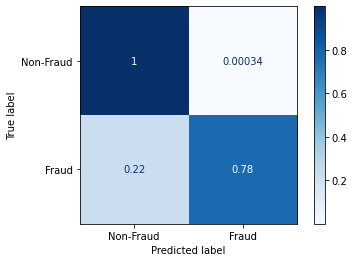

In [38]:
evaluation(y_test, prediction_lr)

With weights 1 and 20:

In [39]:
lr = LogisticRegression(class_weight={0:1,1:20},max_iter=1000)

lr.fit(X_train, y_train)
prediction_lr = lr.predict(X_test)

Out of all fraud prediction 82% was actual fraud. Another improvement. However, the improvement of the fraud category prediction is costing the decrease in precision within the non-fraud category

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85295
       Fraud       0.70      0.82      0.75       148

    accuracy                           1.00     85443
   macro avg       0.85      0.91      0.88     85443
weighted avg       1.00      1.00      1.00     85443



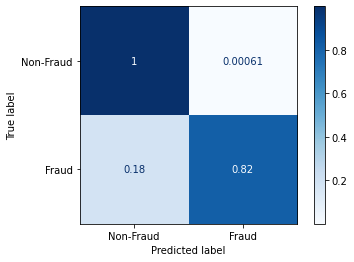

In [40]:
evaluation(y_test, prediction_lr)

Let's try with 1:100:

In [41]:
lr = LogisticRegression(class_weight={0:1,1:100},max_iter=1000)

lr.fit(X_train, y_train)
prediction_lr = lr.predict(X_test)

Again, same pattern. Increased precision within fraud category, but decreased precision within the non-fraud category

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85295
       Fraud       0.27      0.85      0.41       148

    accuracy                           1.00     85443
   macro avg       0.63      0.92      0.70     85443
weighted avg       1.00      1.00      1.00     85443



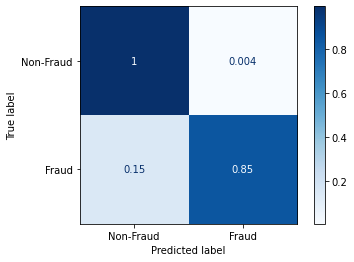

In [42]:
evaluation(y_test, prediction_lr)

# Balancing the dataset
<p>Next we’ll use the excellent imbalanced-learn package to see how that effects our ability to detect fraud.
We’ll start with under-sampling the negative class:

We use random undersampling first. In random undersampling we suppress the non-fraud class since they are the predominant class, but not the one we really care about.

In [43]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler() 
X_resampled, y_resampled = rus.fit_sample(X_train, y_train) 
lr = LogisticRegression() 
lr.fit(X_resampled, y_resampled)
prediction_lr = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Wow! Out of all fraud predictions, the model predicted the fraud correctly 90%.

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99     85295
       Fraud       0.07      0.90      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443



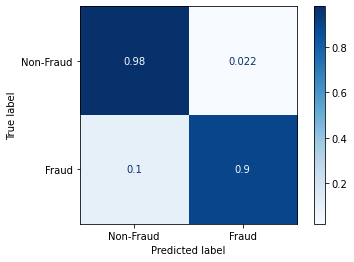

In [44]:
evaluation(y_test, prediction_lr)

Now let's try oversampling the fraud category. The adaptive synthetic sampling approach, or ADASYN algorithm,builds on the methodology of SMOTE, by shifting the importance of the classification boundary to those minority classes which are difficult. ADASYN uses a weighted distribution for different minority class examples according to their level of difficulty in learning, where more synthetic data is generated for minority class examples that are harder to learn.

In [45]:
from imblearn.over_sampling import ADASYN 
ada = ADASYN() 
X_resampled, y_resampled = ada.fit_sample(X_train, y_train) 
lr = LogisticRegression(max_iter=1000) 
lr.fit(X_resampled, y_resampled)
prediction_lr = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Another slight improvement in predicting fraud!

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.92      0.96     85295
       Fraud       0.02      0.93      0.04       148

    accuracy                           0.92     85443
   macro avg       0.51      0.92      0.50     85443
weighted avg       1.00      0.92      0.96     85443



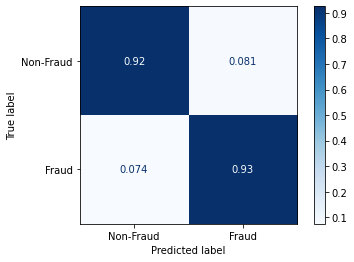

In [46]:
evaluation(y_test, prediction_lr)

#SMOTE
<p>SMOTE: Synthetic Minority Over-sampling Technique
<p>To illustrate how this technique works consider some training data which has s samples, and f features in the feature space of the data. Note that these features, for simplicity, are continuous. As an example, consider a dataset of birds for classification. The feature space for the minority class for which we want to oversample could be beak length, wingspan, and weight (all continuous). To then oversample, take a sample from the dataset, and consider its k nearest neighbors (in feature space). To create a synthetic data point, take the vector between one of those k neighbors, and the current data point. Multiply this vector by a random number x which lies between 0, and 1. Add this to the current data point to create the new, synthetic data point.

Many modifications and extensions have been made to the SMOTE method ever since its proposal.

In [48]:
from imblearn.over_sampling import SMOTE

print("Shape of the X_train before applying SMOTE is: ", X_train.shape)
print("Shape of the y_train data before applying SMOTE is: ", y_train.shape)
print("Shape of the X_test before applying SMOTE is: ", X_test.shape)
print("Shape of the y_test before applying SMOTE is: ", y_test.shape)
print()
print("Before applying SMOTE the count of the fraud cases are: ", y_train.value_counts().values[1])
print("Before applying SMOTE the count of the non-fraud cases are: ", y_train.value_counts().values[0])

sm = SMOTE(random_state = 2)
X_train_s, y_train_s = sm.fit_sample(X_train, y_train.ravel())

print("Shape of the X_train after applying SMOTE is: ", X_train_s.shape)
print("Shape of the y_train data after applying SMOTE is: ", y_train_s.shape)
print()
print("After applying SMOTE the count of the fraud cases are: ", sum(y_train_s == 1))
print("After applying SMOTE the count of the non-fraud cases are: ", sum(y_train_s == 0))
print("After applying SMOTE the percentage of the fraud cases are: ", sum(y_train_s == 1)/ len(y_train_s) * 100.0)
print("After applying SMOTE the percentage of the non-fraud cases are: ", sum(y_train_s == 0)/ len(y_train_s) * 100.0)

Shape of the X_train before applying SMOTE is:  (199364, 30)
Shape of the y_train data before applying SMOTE is:  (199364,)
Shape of the X_test before applying SMOTE is:  (85443, 30)
Shape of the y_test before applying SMOTE is:  (85443,)

Before applying SMOTE the count of the fraud cases are:  344
Before applying SMOTE the count of the non-fraud cases are:  199020


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Shape of the X_train after applying SMOTE is:  (398040, 30)
Shape of the y_train data after applying SMOTE is:  (398040,)

After applying SMOTE the count of the fraud cases are:  199020
After applying SMOTE the count of the non-fraud cases are:  199020
After applying SMOTE the percentage of the fraud cases are:  50.0
After applying SMOTE the percentage of the non-fraud cases are:  50.0


              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99     85295
       Fraud       0.06      0.91      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443



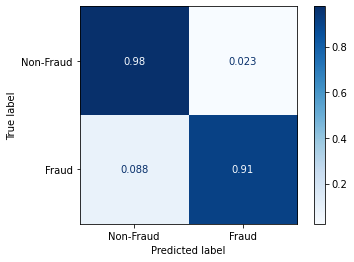

In [49]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_s, y_train_s)

predicted_lr_smote = lr.predict(X_test)
evaluation(y_test, predicted_lr_smote)

Sadly SMOTE actually worked worse than ADASYN.


It could be that because the separation between a fraud vs. non-fraud case is very thin, therefore SMOTE could not draw up good data points

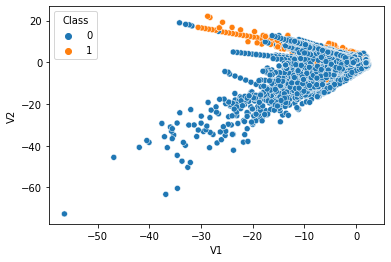

In [82]:
sns.scatterplot(data=df,x="V1",y="V2",hue='Class')

For example, when V1 and V2 were graphed with Class as the color, it is very hard to distinctly draw the difference between V1 and V2- They kind of blend together in one place, being fraud isn't necessarily an 'outlier' in this graph.

Text(0.5, 1.0, 'Precision Recall Curve')

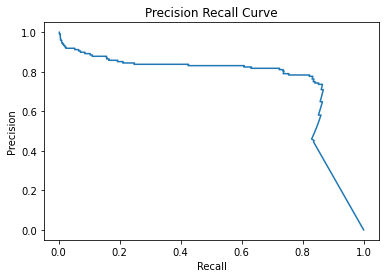

In [50]:
y_pred_prob = lr.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [51]:
print("AUC score is: ", roc_auc_score(y_test, predicted_lr_smote))

AUC score is:  0.9443863744745978


However, it is still a far improvement from the simple logistic regression model we started with. 

In [54]:
def evaluation(y_actual, predicted):
    labels = ['Non-Fraud', 'Fraud']
    plot_confusion_matrix(rfc, X_test, y_test,normalize='true',cmap=plt.cm.Blues,display_labels=labels)  
    #cnf_matrix = confusion_matrix(y_actual, predicted)

    #sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
    #plt.ylabel('Actual Label')
    #plt.xlabel('Predicted Label')
    
    
    print(classification_report(y_actual, predicted, target_names = labels))
    

Let's try Random Forest Classifier

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85295
       Fraud       0.92      0.79      0.85       148

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



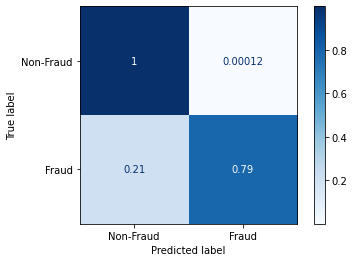

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200)

rfc.fit(X_train_s, y_train_s)

predict_rfc_smote = rfc.predict(X_test)

evaluation(y_test, predict_rfc_smote)

Actually, this model did terrible with fraud class

In [56]:
def evaluation(method,y_actual, predicted):
    labels = ['Non-Fraud', 'Fraud']
    plot_confusion_matrix(method, X_test, y_test,normalize='true',cmap=plt.cm.Blues,display_labels=labels)  
    #cnf_matrix = confusion_matrix(y_actual, predicted)

    #sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
    #plt.ylabel('Actual Label')
    #plt.xlabel('Predicted Label')
    
    
    print(classification_report(y_actual, predicted, target_names = labels))
    

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85295
       Fraud       0.36      0.70      0.47       148

    accuracy                           1.00     85443
   macro avg       0.68      0.85      0.74     85443
weighted avg       1.00      1.00      1.00     85443



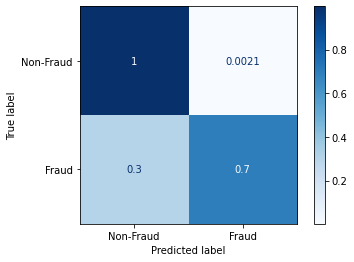

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train_s,y_train_s)
predict_dt_smote=dt.predict(X_test)
evaluation(dt,y_test,predict_dt_smote)


Decision tree classifier wasn't that good either

# SMOTEENN

SMOTEENN combines SMOTE (synthetic over sampling) with Edited Nearest Neighbours, which is used to pare down and centralise the negative cases.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99     85295
       Fraud       0.06      0.91      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443



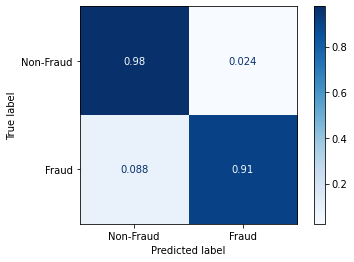

In [58]:
from imblearn.combine import SMOTEENN 
smo = SMOTEENN() 
X_resampled, y_resampled = smo.fit_sample(X_train, y_train) 
lr = LogisticRegression() 
lr.fit(X_resampled, y_resampled)
predict_smoteen = lr.predict(X_test)

evaluation(lr,y_test, predict_smoteen)

This model did relatively well, but not an improvement from SMOTE